# 과제2: 분류모델 기초

## 1.사이킷런과 머신러닝  

- 사이킷런(Scikit-learn): 파이썬에서 사용되는 대표적인 머신러닝 라이브러리
   ex. Classification, Regression, Clustering, Dimensionality reduction, Model Selection, Preprocessing 등 여러 방면으로 활용가능
- Classification: 분류 (ex.물건을 구매할건지 안할건지, 광고를 클릭할건지 안할건지 등을 분류로 예측)
- Regression: 특정 수치로 예측을 할 때 사용 (ex. 매출액 예측)
- Clustering: 군집화
- Supervised learning(지도학습): 학습 알고리즘에게 정답 (labeled data)을 알려주고 학습시키는 것  (회귀)
- Unsupervised learning(비지도학습): 정답이 없는 데이터셋을 통해 학습을 수행 (군집화 문제)

---

## 2.사이킷런 활용 흐름

- Training: Training data와 Training Labels로 학습을 시켜 모델을 만드는 것
- Generalization: Training한 것을 일반화하는 것

#### Supervised Transformations
- clf= RandomForestClassifier()
- clf.fit(X_train, y_train) : Training data, Training Labels - Model
- y_pred= clf.predict(X_test) : Test Data - Prediction
- clf.score(X_test, y_test) : Test Labels - Evaluation

#### Unsupervised Transformations
- pca=PCA()
- pca.fit(X_train)
- X_new=pca.transform(X_test)
- Basic API: estimator.fit(X, [y])

- Cross Validation: 모델이 얼마나 좋은 효능을 내는지 파악  
- Overfitting and Underfitting : 학습이 많을수록 training data에 대한 예측의 정확도가 상승 but 일반화 될 가능성 높음

- Linear Models :  
- Decision Trees
- Random Forests : 모든 데이터를 다 사용하지 않음. 
- Randomized Parameter Search :   
            - Grid Layout  
            - Random Layout

---

## 3. 사이킷런의 의사결정나무 알고리즘

In [2]:
from sklearn import tree
X= [[0, 0], [1, 1]]
Y= [0, 1]

- from sklearn import tree: scikit-learn 라이브러리의 tree 모듈에서 결정 트리 모델을 가져오는 코드
- X는 입력 데이터(feature)이고, Y는 정답 레이블(label)

In [3]:
clf = tree.DecisionTreeClassifier()
clf

DecisionTreeClassifier()

- 결정 트리 분류기 객체 clf를 생성
- 기본 설정으로 (즉, max_depth, criterion 등 아무 옵션 없이) 생성됨.

In [4]:
clf= clf.fit(X,Y)
clf

DecisionTreeClassifier()

- fit을 통해 입력 데이터 X와 정답 Y로 모델을 학습시킴
- 모델은 [0,0]일 때는 0, [1,1]일 때는 1이라고 판단하도록 학습된 상태

In [5]:
clf.predict([[2., 2.]])

array([1])

-  predict(test): 각각 모델의 예측값 출력
- 정답이 0과 1로만 학습을 했기 때문에 1이라는 결과값 출력

In [6]:
clf.predict_proba([[2., 2.]])

array([[0., 1.]])

- predict_proba(test): 분류 모델이 각 클래스에 대한 확률을 출력 (회귀에는 사용 불가)
- [2.0, 2.0]에 대해 각 클래스에 속할 확률을 출력 (클래스 0일 확률=0, 클래스 1일 확률=1)

In [7]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)

- 아이리스 데이터 불러오기
- X에 data의 행렬이, y에는 target벡터 데이터가 할당됨

In [8]:
clf= tree.DecisionTreeClassifier()
clf= clf.fit(X, y)

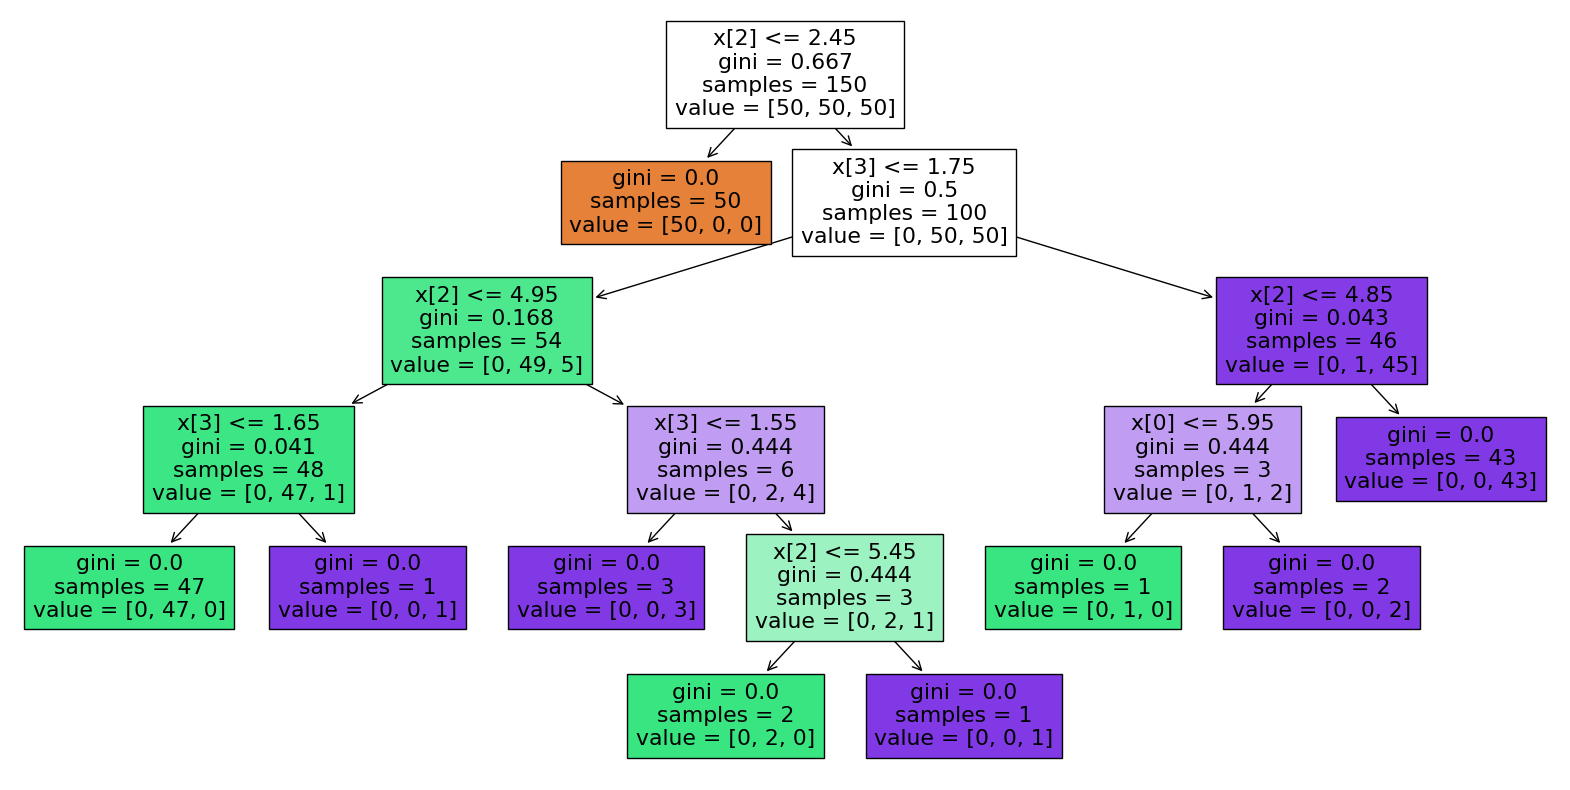

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

t=tree.plot_tree(clf.fit(X, y), filled=True)

---

## 4. 당뇨병 데이터셋 활용하기

#### 1.데이터 변수 설명  
- Pregnancies : 임신 횟수
- Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
- BloodPressure : 이완기 혈압 (mm Hg)
- SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
- Insulin : 2시간 혈청 인슐린 (mu U / ml)
- BMI : 체질량 지수 (체중kg / 키(m)^2)
- DiabetesPedigreeFunction : 당뇨병 혈통 기능
- Age : 나이
- Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0

#### 2. 데이터 불러오기

In [10]:
#필요한 라이브러리 로드
#데이터 분석을 위한 pandas, 수치계산을 위한 numpy
#시각화를 위한 seaborn, matplotlib.pyplot 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df= pd.read_csv("C:/Users/강태희/Documents/data/diabetes.csv")
df.shape

(768, 9)

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- 데이터 상위 5개만 불러와서 미리보기

#### 3. 학습, 예측 데이터셋 설정

8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담기  

In [13]:
split_count= int(df.shape[0] * 0.8)
split_count

614

- df.shape[0]: 전체 행의 수를 나타냄
- 전체 행의 수에서 80%의 정수값을 출력

학습 데이터셋 설정

In [14]:
train= df[:split_count].copy()
train
train.shape

(614, 9)

예측 데이터셋 설정

In [15]:
test= df[split_count:].copy()
test.shape

(154, 9)

학습, 예측에 사용할 컬럼

In [16]:
feature_names= train.columns[:-1].tolist()
feature_names

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

정답값이자 예측해야 될 값

In [17]:
label_name= train.columns[-1]
label_name

'Outcome'

---

#### 4. 학습, 예측 데이터셋 만들기

학습 세트 만들기

In [18]:
X_train= train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


정답 값 만들기

In [19]:
y_train= train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

예측에 사용할 데이터셋 만들기

In [20]:
X_test= test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
614,11,138,74,26,144,36.1,0.557,50
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50


예측의 정답값 

In [21]:
y_test= test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

#### 5. 학습하기

머신러닝 알고리즘 가져오기

In [22]:
from sklearn.tree import DecisionTreeClassifier

model= DecisionTreeClassifier()
model 

DecisionTreeClassifier()

학습(훈련)

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

예측

In [25]:
y_predict= model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

#### 6. 예측한 모델의 성능 측정하기

- 모델을 시각화하여 분석하고, feature 중에서 모델에 영향을 미친 정도를 확인할 수 있다  
- 정확도를 계산하는 방법을 이해한다

- plot_tree
- feature_importances
- accuracy_score

##### 6.1 트리 알고리즘 분석하기

의사결정나무를 시각화한다

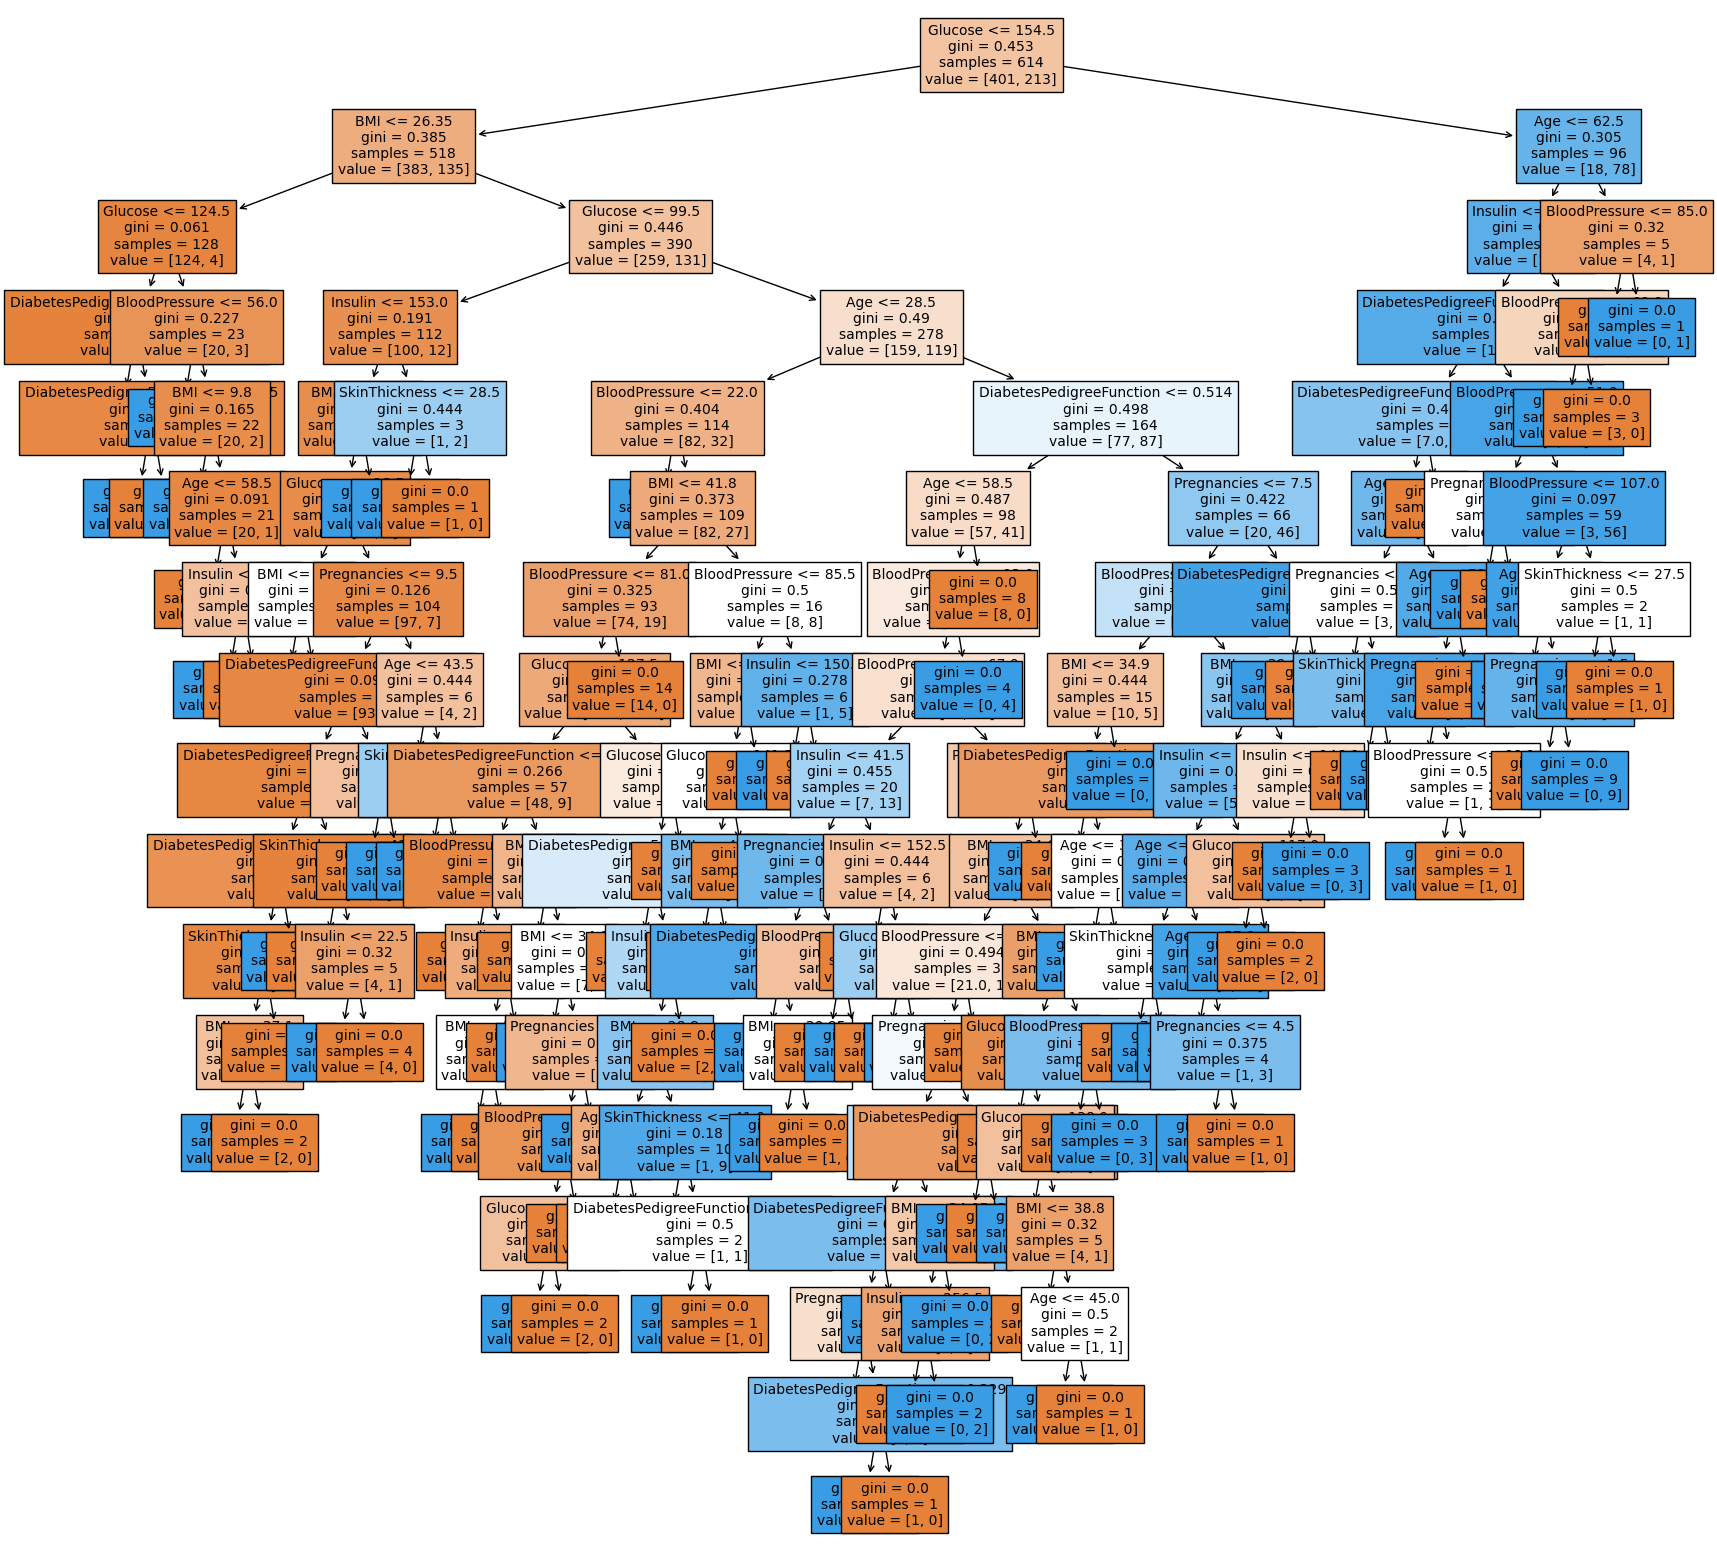

In [30]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,20))
tree= plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

- Gluecose에 따라 값이 True, False로 나눠지는걸 볼 수 있음
- 'Gluecose'가 이 데이터셋에서 가장 좋은 조건인 것을 확인할 수 있음

피처의 중요도 추출하기

In [31]:
model.feature_importances_

array([0.08428517, 0.28798736, 0.11247226, 0.03205327, 0.08770361,
       0.19095765, 0.10754903, 0.09699165])

피처의 중요도 시각화하기

<Axes: >

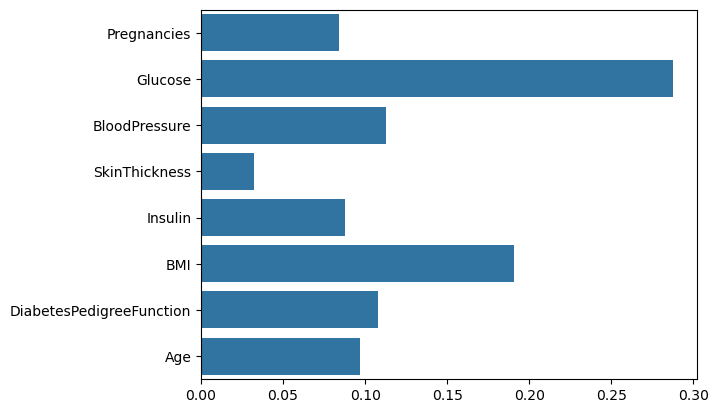

In [32]:
sns.barplot(x=model.feature_importances_, y=feature_names)

- feature_importances를 통해서도 Glucose가 가장 좋은 조건임을 확인할 수 있음
- Glucose, BMI, BloodPressure 순으로 중요한 것을 볼 수 있음

#### 7. 정확도 측정하기

In [34]:
y_predict
y_test - y_predict

# 만든 모델이 얼마나 활용이 가능한지 확인하고 싶을 때
# 실제값 - 예측값을 빼주면 같은 값은 0으로 출력
# 여기에서 절댓값을 씌운 값이 1인 값이 다르게 예측한 값이 된다

614    0
615    0
616   -1
617    0
618    0
      ..
763    0
764    0
765    0
766    0
767    0
Name: Outcome, Length: 154, dtype: int64

In [ ]:
abs(y_test - y_predict).sum() / len(y_test)

0.2727272727272727

- abs(y_test - y_predict).sum() : 총 몇개 예측을 못했는지 알려준다
- abs(y_test - y_predict).sum() / len(y_test): 27% 잘못 예측한걸 확인할 수 있음

In [40]:
diff_count = abs(y_test - y_predict).sum() 
diff_count

42

예측의 정확도 구하기 

In [41]:
(len(y_test) - diff_count) / len(y_test) * 100

72.72727272727273

미리 구현된 알고리즘을 가져와 사용하기

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict) * 100

72.72727272727273

모델의 score로 점수를 계산하기

In [44]:
model.score(X_test, y_test) * 100

72.72727272727273